In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np

|Northeast|Southeast|Southwest|Midwest|West|
|---------|---------|---------|-------|----|
|Connecticut|	Alabama|	Arizona|Illinois|California|
|Delaware|	Arkansas|	Colorado|Indiana|Idaho|
|Maine|	Florida|	Kansas|	Iowa	|Montana||
|Massachusetts|	Georgia|	New Mexico|	Michigan|Nevada|
|Maryland|	Kentucky|	Oklahoma|	Minnesota|Oregon|
|New Hampshire|	Louisiana|	Texas|	Missouri|Utah|
|New Jersey|	Mississippi||Nebraska|Washington|
|New York|	North Carolina||North Dakota|	Wyoming|
|Pennsylvania|	South Carolina||Ohio||
|Rhode Island|	Tennessee||South Dakota||	 
|Vermont|	Virginia||Wisconsin||
|District of Columbia|West Virginia|||	 

In [3]:
df = pd.read_csv('data v_1.csv') 
df = df.drop(columns = 'Unnamed: 0')
df = df[df['Linear Feet'] >= 1]
df = df[df['Carrier Cost (Mixed)'] >= 100]
mapeo = {'Connecticut': 'Northeast', 'Delaware': 'Northeast', 'Maine': 'Northeast', 'Massachusetts': 'Northeast', 'Maryland': 'Northeast', 
         'New Hampshire': 'Northeast', 'New Jersey': 'Northeast', 'New York': 'Northeast', 'Pennsylvania': 'Northeast', 'Rhode Island': 'Northeast', 
         'Vermont': 'Northeast', 'District of Columbia': 'Northeast', 
         'Alabama': 'Southeast', 'Arkansas': 'Southeast', 'Florida': 'Southeast', 'Georgia': 'Southeast', 
         'Kentucky': 'Southeast', 'Louisiana': 'Southeast', 'Mississippi': 'Southeast', 'North Carolina': 'Southeast', 
         'South Carolina': 'Southeast', 'Tennessee': 'Southeast', 'Virginia': 'Southeast', 'West Virginia': 'Southeast', 
         'Arizona': 'Southwest', 'Colorado': 'Southwest', 'Kansas': 'Southwest', 'New Mexico': 'Southwest', 
         'Oklahoma': 'Southwest', 'Texas': 'Southwest', 
         'Illinois': 'Midwest', 'Indiana': 'Midwest', 'Iowa': 'Midwest', 'Michigan': 'Midwest', 
         'Minnesota': 'Midwest', 'Missouri': 'Midwest', 'Nebraska': 'Midwest', 'North Dakota': 'Midwest', 
         'Ohio': 'Midwest', 'South Dakota': 'Midwest', 'Wisconsin': 'Midwest', 
         'California': 'West', 'Idaho': 'West', 'Montana': 'West', 'Nevada': 'West',
         'Oregon': 'West', 'Utah': 'West', 'Washington': 'West', 'Wyoming': 'West',
         'Ontario': 'Canada', 'British Columbia': 'Canada', 'Alberta': 'Canada', 'Quebec': 'Canada', 
         'Manitoba': 'Canada', 'Saskatchewan': 'Canada', 'Nova Scotia': 'Canada', 'New Brunswick': 'Canada', 
         'Newfoundland and Labrador': 'Canada', 'Yukon': 'Canada', 'Prince Edward Island': 'Canada', 'Northwest Territories': 'Canada', 
         'Alaska': 'Offshore'}
df['Region Origen'] = df['Origin State'].map(mapeo)
df['Region Destino'] = df['Destination State'].map(mapeo)
df.head(1)

,Load: Load Number,Load: Created Date,Actual Pickup Date,Origin Zip Code,Destination Zip Code,Origin State,Destination State,Mode,Linear Feet,Total Weight,Distance (Miles),Total HU,Revenue (Mixed) Currency,Revenue (Mixed),Carrier Cost (Mixed) Currency,Carrier Cost (Mixed),Target buy rate,GS Network buy rate,Region Origen,Region Destino
0,SHP5161932,8/5/2024,8/6/2024,45786,33316,Ohio,Florida,Partial F/SD (LTL Spot Market),20.5,1675.0,1081.85,2.0,USD,1600.0,USD,1450.0,2761.0,2732.0,Midwest,Southeast


### ANOVA

Hay que garantizar 2 condiciones. 
* homocedasticidad: Desviación estandar igual o similar
* Distribución normal de cada población

In [29]:
grupo_A = df[df['Region Origen'] == 'Northeast']['Carrier Cost (Mixed)']
grupo_B = df[df['Region Origen'] == 'Southeast']['Carrier Cost (Mixed)']
grupo_C = df[df['Region Origen'] == 'Southwest']['Carrier Cost (Mixed)']
grupo_D = df[df['Region Origen'] == 'Midwest']['Carrier Cost (Mixed)']
grupo_E = df[df['Region Origen'] == 'West']['Carrier Cost (Mixed)']

grupo_Alpha = df[df['Region Destino'] == 'Northeast']['Carrier Cost (Mixed)']
grupo_Betha = df[df['Region Destino'] == 'Southeast']['Carrier Cost (Mixed)']
grupo_Gamma = df[df['Region Destino'] == 'Southwest']['Carrier Cost (Mixed)']
grupo_Xi = df[df['Region Destino'] == 'Midwest']['Carrier Cost (Mixed)']
grupo_Theta = df[df['Region Destino'] == 'West']['Carrier Cost (Mixed)']

In [40]:
std_devA = grupo_A.reset_index()['Carrier Cost (Mixed)'].std()
std_devB = grupo_B.reset_index()['Carrier Cost (Mixed)'].std()
std_devC = grupo_C.reset_index()['Carrier Cost (Mixed)'].std()
std_devD = grupo_D.reset_index()['Carrier Cost (Mixed)'].std()
std_devE = grupo_E.reset_index()['Carrier Cost (Mixed)'].std()

data = pd.DataFrame({
    'Region': ['Northeast', 'Southeast', 'Southwest', 'Midwest', 'West'],
    'Desviación Estándar': [std_devA, std_devB, std_devC, std_devD, std_devE]
})

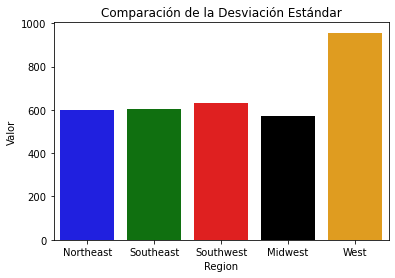

In [41]:
sns.barplot(x='Region', y='Desviación Estándar', data=data, palette=['blue', 'green', 'red', 'black', 'orange'])
plt.ylabel('Valor')
plt.title('Comparación de la Desviación Estándar Origen')
plt.show()

In [42]:
std_devAlpha = grupo_Alpha.reset_index()['Carrier Cost (Mixed)'].std()
std_devBetha = grupo_Betha.reset_index()['Carrier Cost (Mixed)'].std()
std_devGamma = grupo_Gamma.reset_index()['Carrier Cost (Mixed)'].std()
std_devXi = grupo_Xi.reset_index()['Carrier Cost (Mixed)'].std()
std_devTheta = grupo_Theta.reset_index()['Carrier Cost (Mixed)'].std()

dataD = pd.DataFrame({
    'Region': ['Northeast', 'Southeast', 'Southwest', 'Midwest', 'West'],
    'Desviación Estándar': [std_devAlpha, std_devBetha, std_devGamma, std_devXi, std_devTheta]
})

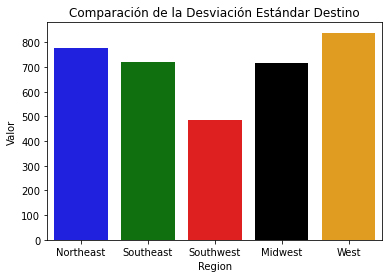

In [43]:
sns.barplot(x='Region', y='Desviación Estándar', data=dataD, palette=['blue', 'green', 'red', 'black', 'orange'])
plt.ylabel('Valor')
plt.title('Comparación de la Desviación Estándar Destino')
plt.show()

Text(0.5, 0, '')

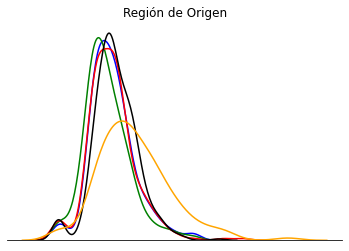

In [47]:
sns.kdeplot(grupo_A.reset_index()['Carrier Cost (Mixed)'], color = "blue")
sns.kdeplot(grupo_B.reset_index()['Carrier Cost (Mixed)'], color = "green")
sns.kdeplot(grupo_C.reset_index()['Carrier Cost (Mixed)'], color = "red")
sns.kdeplot(grupo_D.reset_index()['Carrier Cost (Mixed)'], color = "black")
sns.kdeplot(grupo_E.reset_index()['Carrier Cost (Mixed)'], color = "orange")
sns.despine(top=True, right=True, left=True)
plt.xticks([])
plt.yticks([])
plt.title('Región de Origen')
plt.ylabel("")
plt.xlabel("")

Text(0.5, 0, '')

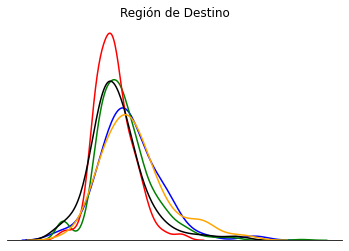

In [48]:
sns.kdeplot(grupo_Alpha.reset_index()['Carrier Cost (Mixed)'], color = "blue")
sns.kdeplot(grupo_Betha.reset_index()['Carrier Cost (Mixed)'], color = "green")
sns.kdeplot(grupo_Gamma.reset_index()['Carrier Cost (Mixed)'], color = "red")
sns.kdeplot(grupo_Xi.reset_index()['Carrier Cost (Mixed)'], color = "black")
sns.kdeplot(grupo_Theta.reset_index()['Carrier Cost (Mixed)'], color = "orange")
sns.despine(top=True, right=True, left=True)
plt.xticks([])
plt.yticks([])
plt.title('Región de Destino')
plt.ylabel("")
plt.xlabel("")

In [49]:
f_metodo, p_metodo = stats.f_oneway(grupo_A, grupo_B, grupo_C, grupo_D, grupo_E)
print(f'ANOVA para Region Origen: F={f_metodo:.2f}, p-value={p_metodo:.4f}')

f_departamento, p_departamento = stats.f_oneway(grupo_Alpha, grupo_Betha, grupo_Gamma, grupo_Xi, grupo_Theta)
print(f'ANOVA para Region Destino: F={f_departamento:.2f}, p-value={p_departamento:.4f}')

ANOVA para Region Origen: F=47.75, p-value=0.0000
ANOVA para Region Destino: F=10.36, p-value=0.0000


Referencia: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f_oneway.html
* F = Relación entre la variabilidad explicada por el factor y la variabilidad no explicada. Valores más altos de F indican una mayor relación.
* p_valor = Un p-valor bajo (generalmente < 0.05) sugiere que hay diferencias significativas entre los grupos, lo que implica que la variable categórica tiene un efecto significativo en la variable numérica.

### Eta cuadrado

In [14]:
# Suma de Cuadrados Total (SST)
sst = np.sum((df['Carrier Cost (Mixed)'] - np.mean(df['Carrier Cost (Mixed)']))**2)

# Suma de Cuadrados entre Grupos (SSB) para 'Region Origen'
ssb_RO = np.sum([len(grupo) * (np.mean(grupo) - np.mean(df['Carrier Cost (Mixed)']))**2 for grupo in [grupo_A, grupo_B, grupo_C, grupo_D, grupo_E]])

# Suma de Cuadrados entre Grupos (SSB) para 'Region Destino'
ssb_RD = np.sum([len(grupo) * (np.mean(grupo) - np.mean(df['Carrier Cost (Mixed)']))**2 for grupo in [grupo_Alpha, grupo_Betha, grupo_Gamma, grupo_Xi, grupo_Theta]])

# Coeficiente Eta para 'Region Origen'
eta_RO = np.sqrt(ssb_RO / sst)
print(f'Eta para Region Origen: {eta_RO:.2f}')

# Coeficiente Eta para 'Region Destino'
eta_RD = np.sqrt(ssb_RD / sst)
print(f'Eta para Region Destino: {eta_RD:.2f}')

Eta para Region Origen: 0.33
Eta para Region Destino: 0.16


In [50]:
#Faltaria verlo por estado